In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [82]:
df = pd.read_csv("/Users/ssgmcollege/Machine_learning_codes/sales_data_sample.csv")
display(df.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [83]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}\nTotal No. of Cells : {df.size}")

No. of Rows : 2823
No. of Columns : 25
Total No. of Cells : 70575


## Handling NULL Values

In [84]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
Total NULL Values : 5157


In [85]:
# df.dropna(inplace=True)  # remove any row with missing data


In [86]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
Total NULL Values : 5157


In [87]:
display(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

# DataType Conversion

In [88]:
# df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
# df['Order_Year'] = df['ORDERDATE'].dt.year
# df['Order_Month'] = df['ORDERDATE'].dt.month
# df['Order_Day'] = df['ORDERDATE'].dt.day
# df['Order_Weekday'] = df['ORDERDATE'].dt.weekday

# cat_cols = ['STATUS', 'PRODUCTLINE', 'DEALSIZE', 'COUNTRY', 'TERRITORY','CITY','STATE']
# le = LabelEncoder()
# for col in cat_cols:
#     df[col] = le.fit_transform(df[col].astype(str))

In [89]:
# drop_cols = ['ORDERNUMBER', 'ORDERLINENUMBER', 'PHONE', 'ADDRESSLINE1', 
#              'ADDRESSLINE2', 'POSTALCODE', 'CUSTOMERNAME', 
#              'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'PRODUCTCODE', 'ORDERDATE']
drop_cols = [
    'ORDERNUMBER', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
    'ADDRESSLINE1','ADDRESSLINE2', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERDATE', 'CITY',
    'ORDERLINENUMBER', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 
    'MSRP', 'POSTALCODE', 'COUNTRY', 'DEALSIZE', 'STATE', 'TERRITORY'
]

df.drop(columns=drop_cols, inplace=True)

In [90]:
numeric_cols = df.select_dtypes(include=np.number).columns


In [91]:
display(df.dtypes)

QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
dtype: object

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


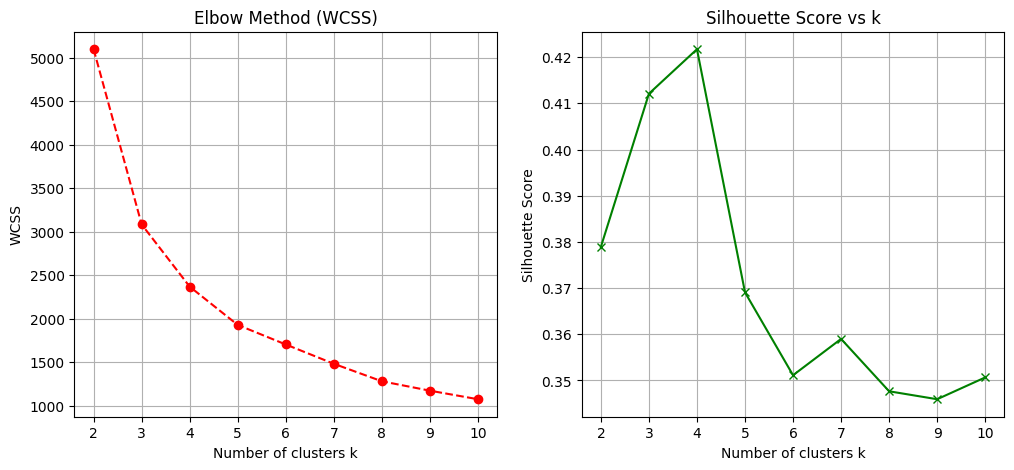

Optimal number of clusters (highest silhouette score): k = 4


In [93]:
wcss = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot WCSS and Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,11), wcss, marker='o', linestyle='--', color='red')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(2,11), sil_scores, marker='x', linestyle='-', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

# Determine optimal k based on max silhouette score
optimal_k = range(2,11)[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): k = {optimal_k}")

In [94]:
optimal_k = 4  

kmeans = KMeans(
    n_clusters=optimal_k, 
    init='k-means++', 
    random_state=42, 
    n_init=50,      # Run 50 times for more stability
    max_iter=500    # Maximum iterations for convergence
)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster_KMeans'] = kmeans_labels

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_cols)
print("KMeans Cluster centroids:\n", centroids)

KMeans Cluster centroids:
    QUANTITYORDERED  PRICEEACH        SALES
0        27.771255  96.483836  3218.262621
1        43.894231  65.717500  2871.713269
2        43.783245  99.122380  5938.328191
3        28.204263  57.067336  1588.049165


Silhouette Score for KMeans with k=4: 0.4219


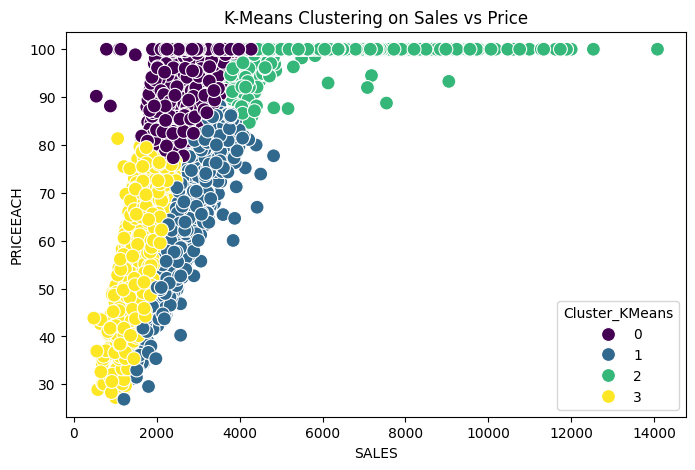

In [98]:
sil_score_final = silhouette_score(X_scaled, df['Cluster_KMeans'])
print(f"Silhouette Score for KMeans with k={optimal_k}: {sil_score_final:.4f}")

plt.figure(figsize=(8,5))
sns.scatterplot(x='SALES', y='PRICEEACH', hue='Cluster_KMeans', data=df, palette='viridis', s=100)
plt.title("K-Means Clustering on Sales vs Price")
plt.show()


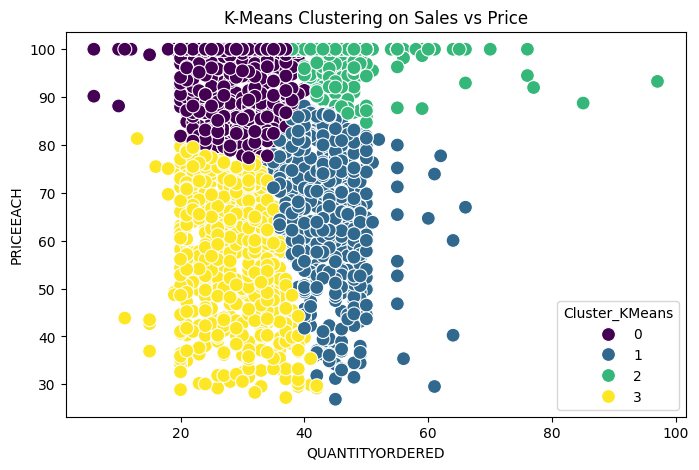

In [99]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='QUANTITYORDERED', y='PRICEEACH', hue='Cluster_KMeans', data=df, palette='viridis', s=100)
plt.title("K-Means Clustering on Sales vs Price")
plt.show()

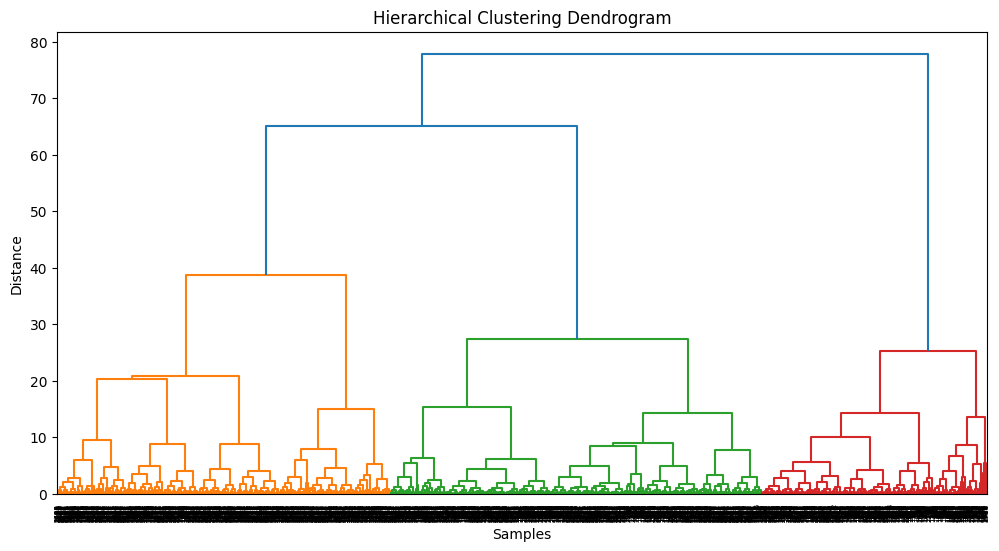

Silhouette Score for Hierarchical Clustering: 0.3854


In [100]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cut tree to get same number of clusters as KMeans
hier_labels = fcluster(linked, t=optimal_k, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

# Silhouette score
sil_score_hier = silhouette_score(X_scaled, hier_labels)
print(f"Silhouette Score for Hierarchical Clustering: {sil_score_hier:.4f}")

In [102]:
print("K-Means Cluster Counts:\n", df['Cluster_KMeans'].value_counts())
print("\nHierarchical Cluster Counts:\n", df['Hierarchical_Cluster'].value_counts())

K-Means Cluster Counts:
 Cluster_KMeans
0    989
2    751
3    563
1    520
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hierarchical_Cluster
2    1124
1     685
4     675
3     339
Name: count, dtype: int64
